In [142]:
import requests
import pandas as pd
import json
import psycopg2
from sqlalchemy import create_engine 
from dask.diagnostics import ProgressBar
import dask.dataframe as dd
import dask.array as da
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from nltk.stem import WordNetLemmatizer
import re
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
#stop_words = set(stopwords.words('english'))
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Problem Statement

Can you predict the type of the complaint based on the given variables?

# Objective

The goal here is to understand what factors contribute most to Complaint Type and create a model that can predict if a certain it. Need to analysis of Independent Variables and then model the algorithm

# Pipeline

1. Clean Data

2. Exploring the data will follow right after and allow further insight of what our dataset contains. 

3. Understanding the relationship each explanatory variable has with the response variable resides here and we can do this with a correlation matrix.

4. Modeling the data will give us our prediction of categorical variable COMPLAINT TYPE

In [5]:
df = dd.read_csv("C:\\EZOIC_ASSESSMENT\\StatenIsland.csv",error_bad_lines=False)


In [6]:
df.compute()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
0,27842655,2014-04-14 14:42:00,2014-08-20 10:55:00,DEP,Department of Environmental Protection,Water System,Defective Street Cut (WZZ1),NaN,10303,2560 RICHMOND TERRACE,...,Unspecified,STATEN ISLAND,40.637646,-74.146516,"(40.63764599489574, -74.14651579795446)",127.0,127.0,2014,4,0
1,27842660,2014-04-14 12:51:00,2014-04-14 14:15:00,DEP,Department of Environmental Protection,Sewer,Sewer Backup (Use Comments) (SA),NaN,10301,128 BENZIGER AVENUE,...,Unspecified,STATEN ISLAND,40.639771,-74.083032,"(40.63977069540825, -74.08303207959038)",0.0,0.0,2014,4,0
2,27842665,2014-04-14 21:11:00,2014-04-17 13:00:00,DEP,Department of Environmental Protection,Water System,Dirty Water (WE),NaN,10301,75 MERRICK AVENUE,...,Unspecified,STATEN ISLAND,40.601326,-74.110605,"(40.60132585651279, -74.11060489240582)",2.0,2.0,2014,4,0
3,27842671,2014-04-14 12:29:00,2014-04-14 19:10:00,DEP,Department of Environmental Protection,Water System,Dirty Water (WE),NaN,10312,57 BLUEBERRY LANE,...,Unspecified,STATEN ISLAND,40.529274,-74.159861,"(40.52927425906048, -74.15986143974995)",0.0,0.0,2014,4,0
4,27842675,2014-04-14 11:59:00,2014-04-14 12:30:00,DEP,Department of Environmental Protection,Water System,Leak (Use Comments) (WA2),NaN,10304,NaN,...,Unspecified,STATEN ISLAND,40.591023,-74.100909,"(40.59102256401196, -74.10090949721042)",0.0,0.0,2014,4,0
5,27842677,2014-04-14 12:13:00,2014-04-15 09:22:00,DEP,Department of Environmental Protection,Water System,Hydrant Leaking (WC1),NaN,10301,31 KIRBY COURT,...,Unspecified,STATEN ISLAND,40.640891,-74.093310,"(40.64089092242066, -74.09330996856224)",0.0,0.0,2014,4,0
6,27842694,2014-04-14 08:46:01,2014-04-14 08:46:01,DOT,Department of Transportation,Street Condition,Pothole,NaN,10312,NaN,...,Unspecified,STATEN ISLAND,40.544275,-74.203074,"(40.544275014632504, -74.20307399007942)",0.0,0.0,2014,4,0
7,27842703,2014-04-14 10:39:59,2014-05-01 10:16:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,10301,34 DUNCAN ROAD,...,Unspecified,STATEN ISLAND,40.625006,-74.090791,"(40.6250060967553, -74.09079129648651)",16.0,16.0,2014,4,0
8,27842717,2014-04-14 21:27:57,2014-04-14 21:27:57,DOT,Department of Transportation,Street Condition,Pothole,NaN,10306,938 OLYMPIA BOULEVARD,...,Unspecified,STATEN ISLAND,40.575559,-74.090451,"(40.57555881718904, -74.09045050316028)",0.0,0.0,2014,4,0
9,27842727,2014-04-14 14:23:10,2014-04-14 14:23:10,DOT,Department of Transportation,Street Condition,Pothole,NaN,10306,CENTER PLACE,...,Unspecified,STATEN ISLAND,40.563122,-74.100349,"(40.56312211099235, -74.1003490882711)",0.0,0.0,2014,4,0


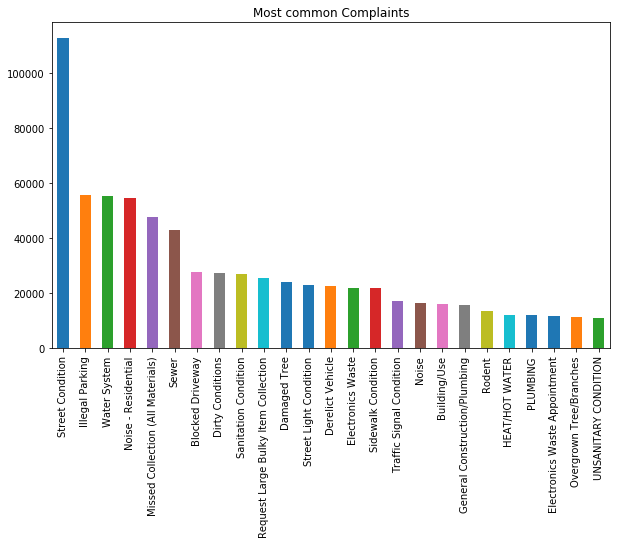

In [7]:
(df['Complaint Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6), title = 'Most common Complaints')

### Applying Lemmitization for Resolution Description Ex: cats --> cat

In [8]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Resolution Description'].unique()
resdes.unique().compute().to_frame()

,Resolution Description
0,"The Department of Environment Protection inspected your complaint but could not find the problem you reported. If the condition persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) with more detailed information to submit a new complaint."
1,The Department of Environmental Protection investigated this complaint and found there was no sewer back up in the city system at the time of the inspection.
2,The Department of Environmental Protection determined that this complaint is a duplicate of a previously filed complaint. The original complaint is being addressed.
3,The Department of Transportation determined that this complaint is a duplicate of a previously filed complaint. The original complaint is being addressed.
4,The Department of Transportation inspected this complaint and repaired the problem.
5,"The Department of Transportation assigned this complaint to a field crew for inspection and, if warranted, repair."
6,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.
7,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.
8,The Department of Health and Mental Hygiene will review your complaint to determine appropriate action. Complaints of this type usually result in an inspection. Please call 311 in 30 days from the date of your complaint for status
9,"The Department of Buildings attempted to investigate this complaint twice but could not gain access to the location. If the problem still exists, please call 311 and file a new complaint with additional access information. If you are outside of New York City, please call (212) NEW-YORK (212-639-9675)."


In [9]:
#[k for k, v in locals().items() if isinstance(v, str) and v == df["Resolution Description"]][0]
df["Resolution Description"]= df["Resolution Description"].astype(str) 

#### Remove Digits
#### Remove Punctuation
#### Remove StopWords   Ex:A AN THE IS .....
###### StemPorter does the below     root word "like" include:->"likes"->"liked"->"likely"->"liking"


In [10]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

import string
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

def to_lower(x):
    return x.lower()


from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavani.nrusimhdevara\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavani.nrusimhdevara\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [11]:
df['Resolution Description'] = df['Resolution Description'].apply(remove_stop_words)
df['Resolution Description'] = df['Resolution Description'].apply(remove_digits)
df['Resolution Description'] = df['Resolution Description'].apply(remove_punctuation)

df['Resolution Description']= df['Resolution Description'].apply(porter.stem)

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:3044: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('Resolution Description', 'object'))

  warnings.warn(meta_warning(meta))
C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:3044: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are

In [12]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Resolution Description'].unique()
resdes.unique().compute().to_frame().head()

,Resolution Description
0,department environment protection inspected complaint could find problem reported condition persists please call or calling nonnew york city area code detailed information submit new complaint
1,department environmental protection investigated complaint found sewer back city system time inspect
2,department environmental protection determined complaint duplicate previously filed complaint original complaint address
3,department transportation determined complaint duplicate previously filed complaint original complaint address
4,department transportation inspected complaint repaired problem


#### Descriptor

In [13]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Descriptor'].unique()
resdes.unique().compute().to_frame().head()

,Descriptor
0,Defective Street Cut (WZZ1)
1,Sewer Backup (Use Comments) (SA)
2,Dirty Water (WE)
3,Leak (Use Comments) (WA2)
4,Hydrant Leaking (WC1)


##### Applying ABOVE to Descriptor

In [14]:
df["Descriptor"]= df["Descriptor"].astype(str) 
df['Descriptor'] = df['Descriptor'].apply(remove_stop_words)
df['Descriptor'] = df['Descriptor'].apply(remove_digits)
df['Descriptor'] = df['Descriptor'].apply(remove_punctuation)
porter = PorterStemmer()

df['Descriptor']= df['Descriptor'].apply(porter.stem)

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:3044: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('Descriptor', 'object'))

  warnings.warn(meta_warning(meta))
C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:3044: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Be

In [15]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Descriptor'].unique()
resdes.unique().compute().to_frame().head()

,Descriptor
0,defective street cut wzz
1,sewer backup use comments sa
2,dirty water w
3,leak use comments wa
4,hydrant leaking wc


In [16]:
pd.set_option('display.max_rows',500)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
0,27842655,2014-04-14 14:42:00,2014-08-20 10:55:00,DEP,Department of Environmental Protection,Water System,defective street cut wzz,NaN,10303,2560 RICHMOND TERRACE,...,Unspecified,STATEN ISLAND,40.637646,-74.146516,"(40.63764599489574, -74.14651579795446)",127.0,127.0,2014,4,0
1,27842660,2014-04-14 12:51:00,2014-04-14 14:15:00,DEP,Department of Environmental Protection,Sewer,sewer backup use comments sa,NaN,10301,128 BENZIGER AVENUE,...,Unspecified,STATEN ISLAND,40.639771,-74.083032,"(40.63977069540825, -74.08303207959038)",0.0,0.0,2014,4,0
2,27842665,2014-04-14 21:11:00,2014-04-17 13:00:00,DEP,Department of Environmental Protection,Water System,dirty water w,NaN,10301,75 MERRICK AVENUE,...,Unspecified,STATEN ISLAND,40.601326,-74.110605,"(40.60132585651279, -74.11060489240582)",2.0,2.0,2014,4,0
3,27842671,2014-04-14 12:29:00,2014-04-14 19:10:00,DEP,Department of Environmental Protection,Water System,dirty water w,NaN,10312,57 BLUEBERRY LANE,...,Unspecified,STATEN ISLAND,40.529274,-74.159861,"(40.52927425906048, -74.15986143974995)",0.0,0.0,2014,4,0
4,27842675,2014-04-14 11:59:00,2014-04-14 12:30:00,DEP,Department of Environmental Protection,Water System,leak use comments wa,NaN,10304,NaN,...,Unspecified,STATEN ISLAND,40.591023,-74.100909,"(40.59102256401196, -74.10090949721042)",0.0,0.0,2014,4,0


##### Checking our Descriptors with Target Variable

In [17]:
df[['Complaint Type','Agency','Descriptor','Resolution Description']].head()

,Complaint Type,Agency,Descriptor,Resolution Description
0,Water System,DEP,defective street cut wzz,department environment protection inspected complaint could find problem reported condition persists please call or calling nonnew york city area code detailed information submit new complaint
1,Sewer,DEP,sewer backup use comments sa,department environmental protection investigated complaint found sewer back city system time inspect
2,Water System,DEP,dirty water w,department environmental protection determined complaint duplicate previously filed complaint original complaint address
3,Water System,DEP,dirty water w,department environment protection inspected complaint could find problem reported condition persists please call or calling nonnew york city area code detailed information submit new complaint
4,Water System,DEP,leak use comments wa,department environmental protection determined complaint duplicate previously filed complaint original complaint address


#### I would make use of descriptor/n in my model or atleast while refining my target variable I would use it

In [18]:
df[['Location Type','Location','Latitude','Longitude']].head()

,Location Type,Location,Latitude,Longitude
0,NaN,"(40.63764599489574, -74.14651579795446)",40.637646,-74.146516
1,NaN,"(40.63977069540825, -74.08303207959038)",40.639771,-74.083032
2,NaN,"(40.60132585651279, -74.11060489240582)",40.601326,-74.110605
3,NaN,"(40.52927425906048, -74.15986143974995)",40.529274,-74.159861
4,NaN,"(40.59102256401196, -74.10090949721042)",40.591023,-74.100909


## Check out for plots after conversion to pandas dataframe

##### CHECK MISSING VALUES BY %

In [19]:
missing_values = df.isnull().sum()
missing_count = ((missing_values / df.index.size) * 100)
with ProgressBar():
    missing_count_pct = missing_count.compute()
missing_count_pct


[########################################] | 100% Completed |  2min 24.3s


Unique Key                        0.000000 
Created Date                      0.000000 
Closed Date                       0.000000 
Agency                            0.000000 
Agency Name                       0.000000 
Complaint Type                    0.000000 
Descriptor                        0.000000 
Location Type                     30.518168
Incident Zip                      0.000000 
Incident Address                  21.100913
Street Name                       21.101314
Cross Street 1                    24.977227
Cross Street 2                    25.149692
Address Type                      3.465143 
City                              0.000000 
Status                            0.000000 
Resolution Description            0.000000 
Resolution Action Updated Date    0.000000 
Community Board                   0.000000 
BBL                               22.850921
Borough                           0.000000 
X Coordinate (State Plane)        4.888960 
Y Coordinate (State Plane)      

##### Here are some of the conclusions I can draw
1. None of the Values are above 50% missing so its fine to keep
2.I dont think even the variables like Location Type /Street Name would be of use to the model as we already have "Location"
3. Location,Latitude and Logitude are missing by just 4% (Negligible)
4. Need to analyze address type column and see if it is of use
5. I would use below columns for my model
6. Need to status of complaint over years
7. Target Variable have nans? ------ NO beacuse we already seen the graph above that ahs no major nulls
8. Location = (Latitude,Longitude)
8. Our Target variable is complaint type so status of incident is not a requirement in model for now
"Agency","Descriptor","Location","City","Status","Resolution Description","Latitude","Longitude",,"Total_Time","Resolution_Time","Year","Month ","DayofWeek"  ----> 15 Independent Variables


#### Location Type

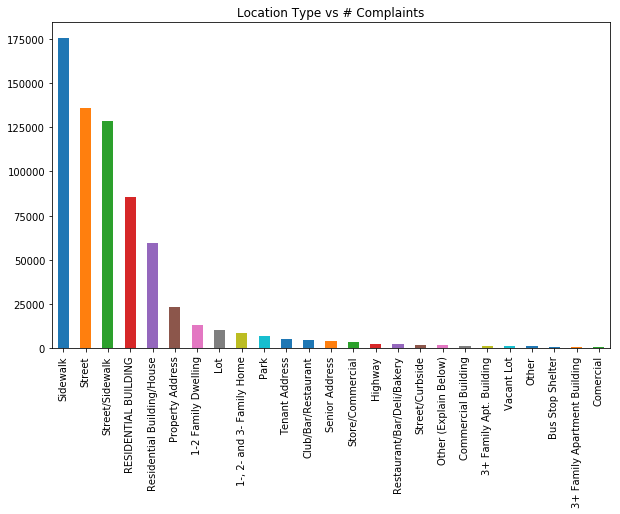

In [20]:
(df['Location Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6),title = 'Location Type vs # Complaints')

###### LOCATION TYPE: Remove Punctuations and convert them into lowe case 

In [21]:
df['Location Type'] = df['Location Type'].astype(str) 
df['Location Type'] = df['Location Type'].apply(to_lower)
df['Location Type'] = df['Location Type'].apply(remove_punctuation)

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:3044: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('Location Type', 'object'))

  warnings.warn(meta_warning(meta))
C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:3044: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
 

In [22]:
df['Location Type'].head()

0    nan
1    nan
2    nan
3    nan
4    nan
Name: Location Type, dtype: object

In [23]:
location_type = df['Location Type'].value_counts().compute()
location_type = location_type.sort_values(ascending=True)
#Reversing array as maximum number of complaintS should appear first 
location_type[::-1]

nan                                   304535
sidewalk                              175447
street                                135527
streetsidewalk                        128377
residential building                  85726 
residential buildinghouse             59611 
property address                      23269 
12 family dwelling                    13207 
lot                                   10647 
1 2 and 3 family home                 8980  
park                                  7139  
tenant address                        5409  
clubbarrestaurant                     4660  
senior address                        3964  
storecommercial                       3822  
highway                               2677  
restaurantbardelibakery               2657  
streetcurbside                        2028  
other explain below                   1715  
commercial building                   1461  
3 family apt building                 1340  
vacant lot                            1243  
other     

In [24]:
df[["Location","Location Type","Latitude","Longitude","Incident Address","Address Type"]].head(10)

,Location,Location Type,Latitude,Longitude,Incident Address,Address Type
0,"(40.63764599489574, -74.14651579795446)",nan,40.637646,-74.146516,2560 RICHMOND TERRACE,ADDRESS
1,"(40.63977069540825, -74.08303207959038)",nan,40.639771,-74.083032,128 BENZIGER AVENUE,ADDRESS
2,"(40.60132585651279, -74.11060489240582)",nan,40.601326,-74.110605,75 MERRICK AVENUE,ADDRESS
3,"(40.52927425906048, -74.15986143974995)",nan,40.529274,-74.159861,57 BLUEBERRY LANE,ADDRESS
4,"(40.59102256401196, -74.10090949721042)",nan,40.591023,-74.100909,NaN,INTERSECTION
5,"(40.64089092242066, -74.09330996856224)",nan,40.640891,-74.093310,31 KIRBY COURT,ADDRESS
6,"(40.544275014632504, -74.20307399007942)",nan,40.544275,-74.203074,NaN,INTERSECTION
7,"(40.6250060967553, -74.09079129648651)",nan,40.625006,-74.090791,34 DUNCAN ROAD,ADDRESS
8,"(40.57555881718904, -74.09045050316028)",nan,40.575559,-74.090451,938 OLYMPIA BOULEVARD,ADDRESS
9,"(40.56312211099235, -74.1003490882711)",nan,40.563122,-74.100349,CENTER PLACE,BLOCKFACE


1. Locaion Type has >80000 null values which is bit bothering
2. First Can we predict Location Type?
3. If so How to to predict it/Check Acurracy?   --> Agency , Latitude, Longitude, Incizent Zip lets try ...
4. Incident Address Cannot identify the type of location at all

In [25]:
df["Address Type"].unique()

Dask Series Structure:
npartitions=1
    object
    ...   
Name: Address Type, dtype: object
Dask Name: unique-agg, 399 tasks

#############################################################################################################
############################################################################################################
###############################################################################################################
##################################################################################################################
####################################################################################################################

## Converting DASK to Pandas Dataframe

In [26]:
df = df.compute()

In [27]:
df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
75507,27842361,2014-04-14 14:24:04,2014-04-22 00:00:00,DOB,Department of Buildings,Building/Use,illegal conversion residential buildingspac,nan,10304,105 SEAVIEW AVENUE,...,Unspecified,STATEN ISLAND,40.589450,-74.097832,"(40.58944970896412, -74.09783230718654)",7.0,7.0,2014,4,0
75508,27842539,2014-04-14 09:52:38,2014-05-19 00:00:00,DOB,Department of Buildings,Special Projects Inspection Team (SPIT),advertising signbillboardpostersflexible fabric illeg,nan,10302,1418 FOREST AVENUE,...,Unspecified,STATEN ISLAND,40.624931,-74.136009,"(40.62493130311471, -74.13600850379385)",34.0,34.0,2014,4,0
75509,27842552,2014-04-14 17:52:00,2014-04-14 19:50:00,DOT,Department of Transportation,Traffic Signal Condition,control,nan,10302,NaN,...,Unspecified,STATEN ISLAND,40.632795,-74.134043,"(40.63279469724564, -74.13404297615234)",0.0,0.0,2014,4,0
75510,27842575,2014-04-14 15:05:00,2014-04-15 12:00:00,DSNY,BCC - Staten Island,Sanitation Condition,street conddumpoutdropoff,street,10314,515 WILD AVENUE,...,Unspecified,STATEN ISLAND,40.586924,-74.198048,"(40.58692446449451, -74.19804797306715)",0.0,0.0,2014,4,0
75511,27842602,2014-04-14 11:49:00,2014-04-15 12:00:00,DSNY,BCC - Staten Island,Sanitation Condition,street conddumpoutdropoff,street,10314,NaN,...,Unspecified,STATEN ISLAND,40.611263,-74.151122,"(40.611262557229324, -74.1511220464914)",1.0,1.0,2014,4,0


##### Removing NULL values of Location Latitude and Longitude from my dataset as they constitude 4% of missing values

In [28]:
df= df[df['Longitude'].notnull()]
df= df[df['Latitude'].notnull()]
df= df[df['Location'].notnull()]

###### Analysisng our Target Variable with IVs

(-74.27388373459783, -73.95124011106034, 40.48287284749398, 40.70352323640801)

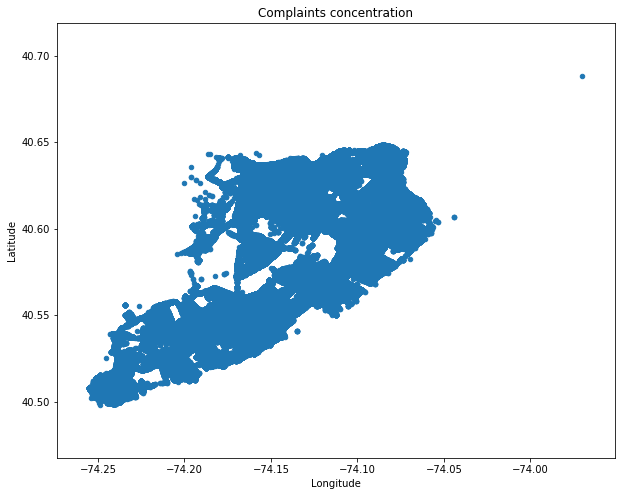

In [29]:
df.plot(kind='scatter',x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaints concentration').axis('equal')

(-74.25521082534918, -73.96991302030901, 40.49804421521046, 40.688351868691534)

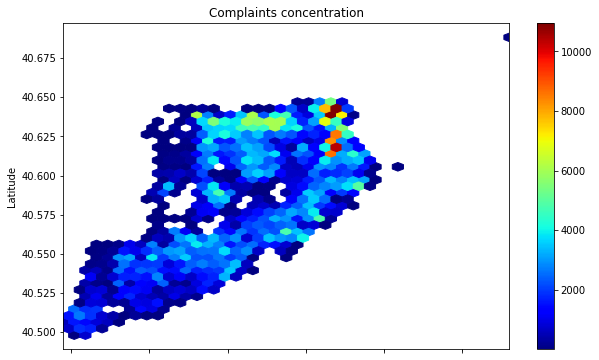

In [30]:
df.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,colormap = 'jet',mincnt=1,title = 'Complaints concentration', figsize=(10,6)).axis('equal')

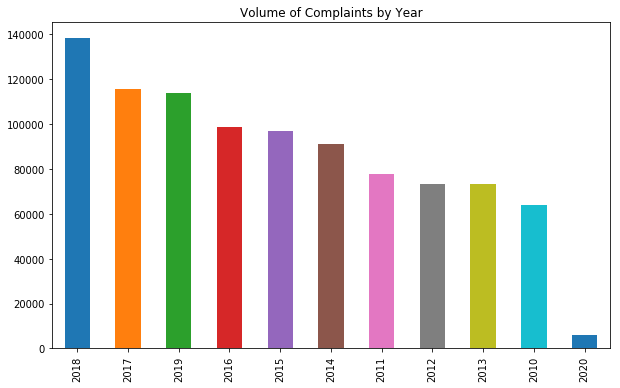

In [31]:
##### Complaints by Year 

df['Year'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Complaints by Year')

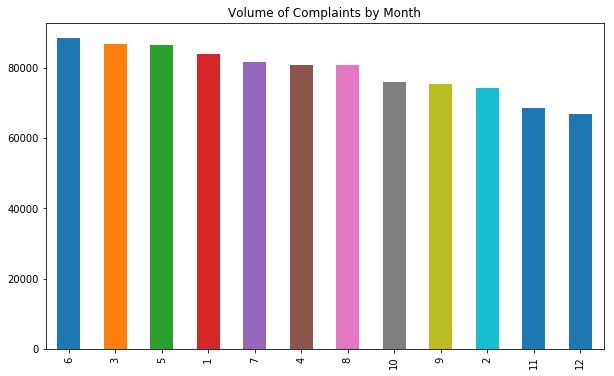

In [32]:
df['Month'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Complaints by Month')

#### January,October-Novemeber and May are of most complaints

#############################################################################################################
#############################################################################################################

### Complaint Type : Target Variable Analysis and MeRGINGS

In [33]:
df['Complaint Type'] = df['Complaint Type'].apply(remove_punctuation)

df['Complaint Type'] = df['Complaint Type'].apply(to_lower)

In [34]:
df['Complaint Type'].value_counts()

street condition                         111756
illegal parking                          55546 
water system                             55204 
noise  residential                       54447 
missed collection all materials          47552 
sewer                                    42777 
blocked driveway                         27771 
dirty conditions                         27311 
sanitation condition                     26831 
request large bulky item collection      25535 
damaged tree                             23995 
street light condition                   22985 
derelict vehicle                         22581 
electronics waste                        21967 
sidewalk condition                       21722 
traffic signal condition                 17372 
noise                                    16631 
buildinguse                              16011 
general constructionplumbing             15593 
plumbing                                 15015 
rodent                                  

In [35]:
df[['Complaint Type','Descriptor']]

,Complaint Type,Descriptor
0,water system,defective street cut wzz
1,sewer,sewer backup use comments sa
2,water system,dirty water w
3,water system,dirty water w
4,water system,leak use comments wa
5,water system,hydrant leaking wc
6,street condition,pothol
7,street condition,pothol
8,street condition,pothol
9,street condition,pothol


###### Heat Complaints

In [36]:
df[df['Complaint Type'].str.contains("cool") ][['Complaint Type',"Descriptor"]]

,Complaint Type,Descriptor
37670,cooling tower,unsanitary condit


In [37]:
df[df['Complaint Type'].str.contains("heat") ]["Complaint Type"].unique()

array(['heathot water', 'heating'], dtype=object)

In [38]:
df['Complaint Type'] = df['Complaint Type'].replace(['heathot water', 'nonresidential heat','heating'], 'HeatComplaints')

##### Noise Complaints

In [39]:
df[df['Complaint Type'].str.contains("noise") ]["Complaint Type"].unique()

array(['noise', 'noise  commercial', 'noise  residential',
       'collection truck noise', 'noise  streetsidewalk', 'noise  park',
       'noise  vehicle', 'noise  helicopter', 'noise  house of worship',
       'noise survey'], dtype=object)

##### Whats a Noise Survey Means?

In [40]:
df[df['Complaint Type'].str.contains("noise survey") ][['Complaint Type',"Descriptor","Resolution Description","Agency"]].head()

,Complaint Type,Descriptor,Resolution Description,Agency
45890,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
45895,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
45899,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
45901,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
45928,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1


###### Its noise created by people and they 3-1-1 to complain. 311 is non emergency phone number

In [41]:
df['Complaint Type'] = df['Complaint Type'].replace(['noise', 'collection truck noise', 'noise  commercial',
       'noise  residential', 'noise  vehicle', 'noise  house of worship',
       'noise  streetsidewalk', 'noise  park', 'noise  helicopter',
       'noise survey'], 'NoiseComplaints')

##### Construction/Plumbing Complaints

In [42]:
df[df['Complaint Type'].str.contains("construction|plumbing") ]["Complaint Type"].unique()

array(['general constructionplumbing', 'plumbing',
       'construction safety enforcement', 'general construction',
       'construction'], dtype=object)

In [43]:
df['Complaint Type'] = df['Complaint Type'].replace(['general constructionplumbing', 'construction safety enforcement',
       'construction lead dust', 'general construction', 'construction','plumbing'],'Construction/PlumbingComplaints')

###### Parking Complaints

In [44]:
df[df['Complaint Type'].str.contains("parking|blocked driveway|park") ]["Complaint Type"].unique()

array(['violation of park rules', 'illegal parking', 'blocked driveway',
       'animal in a park', 'municipal parking facility',
       'broken parking meter', 'trafficillegal parking'], dtype=object)

In [45]:
df[df['Complaint Type'].str.contains("dof parking  payment issue") ][['Complaint Type',"Descriptor","Resolution Description","Agency"]].head()

,Complaint Type,Descriptor,Resolution Description,Agency


##### Note dof parking payment: comes under dof issues because you will know what type of complaint in descriptor

In [46]:
# Note dof parking payment comes under dof issues because you will know what type of complaint in descriptor

df['Complaint Type'] = df['Complaint Type'].replace(['illegal parking', 'municipal parking facility',
       'broken parking meter', 'trafficillegal parking','violation of park rules','blocked driveway'],'ParkingComplaints')

##### DOF issues (Department of Fiance)

In [47]:
df[df['Complaint Type'].str.contains("dof") ]["Complaint Type"].unique()

array(['dof property  payment issue'], dtype=object)

In [48]:
df['Complaint Type'] = df['Complaint Type'].replace(['dof property  payment issue', 'dof property  owner issue',
       'dof property  request copy', 'dof property  reduction issue',
       'dof property  city rebate', 'dof parking  payment issue',
       'dof property  property value', 'dof property  rpie issue',
       'dof property  state rebate', 'dof parking  tax exemption',
       'dof property  update account'],'DOFComplaints')

###### Paint Plaster Issues

In [49]:
df[df['Complaint Type'].str.contains("paint") ]["Complaint Type"].unique()

array(['paintplaster', 'paint  plaster'], dtype=object)

In [50]:
df['Complaint Type'] = df['Complaint Type'].replace(['paintplaster', 'paint  plaster'],'Paint/PlasterComplaints')

##### Water Complaints

In [51]:
df[df['Complaint Type'].str.contains("water") ]["Complaint Type"].unique()

array(['water system', 'standing water', 'water conservation',
       'water quality', 'water leak', 'drinking water', 'bottled water'],
      dtype=object)

In [52]:
df['Complaint Type'] = df['Complaint Type'].replace(['water system', 'water leak', 'standing water',
       'water conservation', 'water quality', 'drinking water',
       'bottled water'],'WaterComplaints')

##### SanitaryCompalints

In [53]:
df[df['Complaint Type'].str.contains("dirt|sanitation condition") ]["Complaint Type"].unique()

array(['dirty conditions', 'sanitation condition'], dtype=object)

In [54]:
df['Complaint Type'] = df['Complaint Type'].replace(['unsanitary pigeon condition',
    'unsanitary condition','dirty conditions','unsanitary animal pvt property','sanitation condition'],'SanitationComplaints')

###### Highway Complaints

In [55]:
df[df['Complaint Type'].str.contains("highway") ]["Complaint Type"].unique()

array(['highway condition', 'highway sign  dangling',
       'highway sign  missing', 'highway sign  damaged'], dtype=object)

In [56]:
df['Complaint Type'] = df['Complaint Type'].replace(['highway condition', 'highway sign  missing',
       'highway sign  dangling', 'highway sign  damaged'],'HighwayComplaints')

###### Street/Vehicle/TreeCompalints

In [57]:
df[df['Complaint Type'].str.contains("tree|sidewalk|vehicle") ]["Complaint Type"].unique()

array(['street condition', 'street light condition', 'derelict vehicles',
       'derelict vehicle', 'street sign  missing', 'sidewalk condition',
       'dead tree', 'street sign  damaged', 'new tree request',
       'overgrown treebranches', 'damaged tree', 'street sign  dangling',
       'rootsewersidewalk condition', 'illegal tree damage',
       'for hire vehicle complaint', 'for hire vehicle report',
       'request xmas tree collection', 'deaddying tree',
       'abandoned vehicle', 'homeless street condition',
       'city vehicle placard complaint'], dtype=object)

###### Checking ("request xmas tree collection","homeless street condition")

In [58]:
pd.set_option('display.max_colwidth', -1)
df[df['Complaint Type'].str.contains("request xmas tree collection","homeless street condition") ][["Descriptor","Resolution Description"]].head()
####during christmas people order xmas trees and keep it on side walk issues

,Descriptor,Resolution Description
101345,c request xmas trees collect,department sanitation investigated complaint found condition loc
85606,c request xmas trees collect,department sanitation investigated complaint addressed issue problem persists call enter new complaint outside new york city please call newyork
85803,c request xmas trees collect,department sanitation removed item
85814,c request xmas trees collect,department sanitation removed item
85816,c request xmas trees collect,department sanitation removed item


In [59]:
pd.set_option('display.max_colwidth', -1)
df[df['Complaint Type'].str.contains("homeless street condition") ][["Descriptor","Resolution Description"]].head()
####during christmas people order xmas trees and keep it on side walk issues

,Descriptor,Resolution Description
41636,nan,police department responded complaint information available observed evid
42694,nan,police department responded complaint determined police action necessari
43258,nan,police department responded complaint information available observed evid
44504,nan,police department responded complaint took action fix condit
46586,nan,police department responded complaint took action fix condit


In [60]:
#graffiti
pd.set_option('display.max_colwidth', 1)

df[df['Complaint Type'].str.contains("graffiti") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
264,graffiti,city removed graffiti properti
440,graffiti,city removed graffiti properti
827,graffiti,city inspected property cleaning graffiti found
1024,graffiti,city inspected property cleaning graffiti found
1086,graffiti,city removed graffiti properti


##### I am removing homeless street condition as it comes under HomelessComplaints

In [61]:
df['Complaint Type'] = df['Complaint Type'].replace(['street light condition', 'street condition',
       'street sign  damaged', 'sidewalk condition', 'dead tree',
       'street sign  dangling', 'street sign  missing', 'damaged tree',
       'new tree request', 'illegal tree damage',
       'rootsewersidewalk condition', 'overgrown treebranches',
       'request xmas tree collection', 'deaddying tree',
       'dep sidewalk condition','graffiti','derelict vehicles',
       'for hire vehicle complaint', 'derelict vehicle',
       'for hire vehicle report', 'abandoned vehicle',
       'city vehicle placard complaint'],'StreetComplaints')

##### Sewer Complaints,Traffic,Homeless

In [62]:
df[df['Complaint Type'].str.contains("sewer|sewage") ]["Complaint Type"].unique()


array(['sewer', 'indoor sewage'], dtype=object)

In [63]:
df['Complaint Type'] = df['Complaint Type'].replace(['sewer','indoor sewage'],'SewerComplaints')

##### Homeless Complaints

In [64]:
df[df['Complaint Type'].str.contains("homeless") ]["Complaint Type"].unique()

array(['homeless encampment', 'homeless person assistance',
       'homeless street condition'], dtype=object)

In [65]:
df['Complaint Type'] = df['Complaint Type'].replace(['homeless street condition',
                                                     'homeless encampment', 'homeless person assistance'],'HomelessComplaints')

In [66]:
df[df['Complaint Type'].str.contains("traffic|signal") ]["Complaint Type"].unique()

array(['traffic signal condition', 'traffic'], dtype=object)

In [67]:
df['Complaint Type'] = df['Complaint Type'].replace(['traffic signal condition', 'traffic'],'TrafficComplaints')

##### Taxi Complaints

In [68]:
df[df['Complaint Type'].str.contains("taxi") ]["Complaint Type"].unique()

array(['taxi complaint', 'taxi report'], dtype=object)

In [69]:
df['Complaint Type'] = df['Complaint Type'].replace(['taxi complaint', 'taxi report', 'taxi compliment',
       'green taxi report', 'dispatched taxi complaint'],'TaxiComplaints')

###### Building Complaints

In [70]:
df[df['Complaint Type'].str.contains("building|floor|window|apt|apartment") ]["Complaint Type"].unique()

array(['buildinguse', 'flooringstairs', 'doorwindow', 'outside building',
       'building marshals office'], dtype=object)

###### Checking the Building Complaints in detail

In [71]:
df[df['Complaint Type'].str.contains("building|floor|window|apt|apartment") ][["Complaint Type","Descriptor","Resolution Description"]]

,Complaint Type,Descriptor,Resolution Description
16,buildinguse,illegal conversion residential buildingspac,department buildings attempted investigate complaint twice could gain access location problem still exists please call file new complaint additional access information outside new york city please call newyork
34,flooringstairs,floor,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd
36,buildinguse,illegal conversion residential buildingspac,nan
83,doorwindow,window pan,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd
91,flooringstairs,stair,department housing preservation development inspected following conditions violations previously issued conditions information specific violations available wwwnycgovhpd
107,flooringstairs,floor,department housing preservation development inspected following conditions violations issued complaint clos
109,buildinguse,illegal conversion residential buildingspac,department buildings investigated complaint determined action necessari
155,doorwindow,window pan,department housing preservation development inspected following conditions violations issued complaint clos
176,buildinguse,sro illegal workno permitchange occupancyus,department buildings attempted investigate complaint twice could gain access location problem still exists please call file new complaint additional access information outside new york city please call newyork
177,buildinguse,illegal conversion residential buildingspac,department buildings investigated complaint issued office administrative trials hearings oath summon


In [72]:
df['Complaint Type'] = df['Complaint Type'].replace(['doorwindow', 'flooringstairs', 'buildinguse', 'outside building',
       'vacant apartment', 'building marshals office',
       'building condition','elevator'],'BuildingComplaints')

##### Rodent

In [73]:
df[df['Complaint Type'].str.contains("rodent|cockroach|pest") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
15,condition attracting rod,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
108,condition attracting rod,updated status complaint go online nycgov use check status field call
138,rat sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
141,rat sight,updated status complaint go online nycgov use check status field call
344,condition attracting rod,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu


In [74]:
df[df['Complaint Type'].str.contains("broken muni meter") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
2005,receipt,department transportation inspected condition reported find additional information notes customer field
42104,order,general maintenance cleaning regular schedule next scheduled maintenance cleaning correct condit
53947,receipt,department transportation inspected condition reported find additional information notes customer field
65720,coin card regist,department transportation completed request corrected condit
73613,coin card regist,department transportation inspected condition reported find additional information notes customer field


In [75]:
df[df['Complaint Type'].str.contains("request large bulky item collection") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
18501,request large bulky item collect,nan
18595,request large bulky item collect,nan
18607,request large bulky item collect,nan
18659,request large bulky item collect,nan
18660,request large bulky item collect,nan


In [76]:
df['Complaint Type'].value_counts()

StreetComplaints                         265203
NoiseComplaints                          91036 
ParkingComplaints                        85748 
WaterComplaints                          69444 
SanitationComplaints                     67679 
missed collection all materials          47552 
SewerComplaints                          43302 
Construction/PlumbingComplaints          38996 
request large bulky item collection      25535 
BuildingComplaints                       24817 
electronics waste                        21967 
TrafficComplaints                        19198 
HeatComplaints                           18087 
rodent                                   13496 
electronics waste appointment            11768 
snow                                     10065 
Paint/PlasterComplaints                  9845  
electric                                 6232  
nonemergency police matter               5983  
consumer complaint                       5180  
other enforcement                       

In [77]:
df.loc[~df["Complaint Type"].isin(['NoiseComplaints',
'HeatComplaints',                           
'StreetComplaints',                         
'Construction/PlumbingComplaints',                    
'SanitationComplaints',                     
'WaterComplaints',                         
'BuildingComplaints',                       
'Paint/PlasterComplaints',                   
'TaxiComplaints',                           
'HomelessComplaints',
'DOFComplaints',
'HighwayComplaints',
'ParkingComplaints',
'broken muni meter',                        
'rodent',                                   
'consumer complaint',                      
'electric',                                  
'general',                                 
'SewerComplaints',                          
'request large bulky item collection',      
'air quality',                                
'nonconst',                                 
'TrafficComplaints',                         
'vending',                                   
'food establishment',                       
'missed collection all materials' ]), "Complaint Type"] = "Other Complaints"

In [78]:
df['Complaint Type'].value_counts()

StreetComplaints                       265203
Other Complaints                       98835 
NoiseComplaints                        91036 
ParkingComplaints                      85748 
WaterComplaints                        69444 
SanitationComplaints                   67679 
missed collection all materials        47552 
SewerComplaints                        43302 
Construction/PlumbingComplaints        38996 
request large bulky item collection    25535 
BuildingComplaints                     24817 
TrafficComplaints                      19198 
HeatComplaints                         18087 
rodent                                 13496 
Paint/PlasterComplaints                9845  
electric                               6232  
consumer complaint                     5180  
nonconst                               3668  
HighwayComplaints                      2560  
air quality                            2518  
broken muni meter                      2421  
food establishment                

In [79]:
df[df['Complaint Type'].str.contains("vending|food establishment") ][["Complaint Type","Descriptor","Resolution Description"]].head()

,Complaint Type,Descriptor,Resolution Description
12935,food establishment,rodentsinsectsgarbag,department health mental hygiene sent official written notification ownerlandlord warning potential violations instructing correct situation situation persists days initial complaint please make new complaint
63966,food establishment,facility construct,department health mental hygiene sent official written notification ownerlandlord warning potential violations instructing correct situation situation persists days initial complaint please make new complaint
64337,vending,unlicens,police department responded complaint information available observed evidence violation tim
78243,food establishment,rodentsinsectsgarbag,department health mental hygiene sent official written notification ownerlandlord warning potential violations instructing correct situation situation persists days initial complaint please make new complaint
78367,food establishment,food spoil,department health mental hygiene sent official written notification ownerlandlord warning potential violations instructing correct situation situation persists days initial complaint please make new complaint


In [80]:
df['Complaint Type'] = df['Complaint Type'].replace(['vending'],'StreetComplaints')

##### Vending Complaints comes uder Street Complaints

In [81]:
df['Complaint Type'].value_counts()

StreetComplaints                       265560
Other Complaints                       98835 
NoiseComplaints                        91036 
ParkingComplaints                      85748 
WaterComplaints                        69444 
SanitationComplaints                   67679 
missed collection all materials        47552 
SewerComplaints                        43302 
Construction/PlumbingComplaints        38996 
request large bulky item collection    25535 
BuildingComplaints                     24817 
TrafficComplaints                      19198 
HeatComplaints                         18087 
rodent                                 13496 
Paint/PlasterComplaints                9845  
electric                               6232  
consumer complaint                     5180  
nonconst                               3668  
HighwayComplaints                      2560  
air quality                            2518  
broken muni meter                      2421  
food establishment                

##### Revisiting Location Type (Only doing it for highest amount of variables)

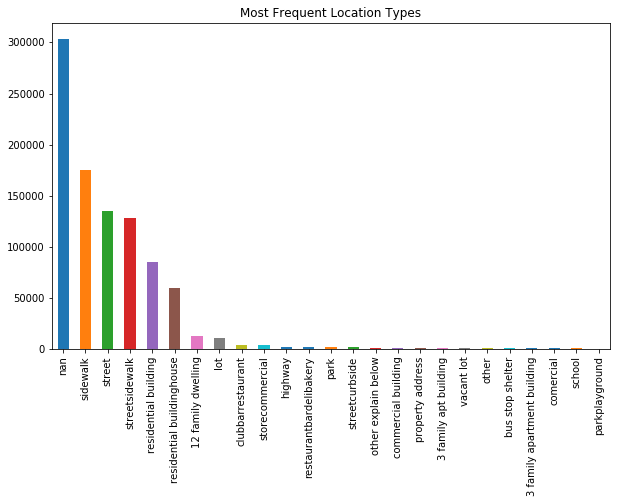

In [82]:
(df['Location Type'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Most Frequent Location Types')

In [83]:
df['Location Type'].unique()

array(['nan', 'residential building', '12 family dwelling', 'sidewalk',
       'street', 'lot', 'other explain below', 'streetsidewalk',
       'residential', '3 family mixed use building', 'comercial',
       '3 family apt building', 'office building', 'park',
       'clubbarrestaurant', 'vacant lot', 'overpass',
       'government building', 'other', 'commercial building',
       'restaurantbardelibakery', 'residential buildinghouse',
       'mixed use', 'highway', 'parking lotgarage', 'vacant building',
       'construction site', '3 family apartment building',
       '12 family mixed use building', 'abandoned building',
       'bus stop shelter', 'public gardenpark', 'hospital', 'crosswalk',
       'roadway tunnel', 'pool', 'storecommercial', 'vehicle lane',
       'catch basinsewer', 'senior center', 'schoolpreschool',
       'streetcurbside', 'recreation center', 'single room occupancy sro',
       'school', 'summer camp', 'beach', 'street and sidewalk',
       'parkplayground', 

In [84]:
df[df['Location Type'].str.contains("residential") ]["Location Type"].unique()

array(['residential building', 'residential', 'residential buildinghouse',
       'residential property', 'building nonresidential'], dtype=object)

In [85]:
df['Location Type'] = df['Location Type'].replace(['residential building', 'residential', 'residential buildinghouse',
       'residential property'],'RESIDENTIAL')

In [86]:
df[df['Location Type'].str.contains("school") ]["Location Type"].unique()

array(['schoolpreschool', 'school', 'school safety zone',
       'cafeteria  private school', 'private school',
       'cafeteria  public school'], dtype=object)

In [87]:
df['Location Type'] = df['Location Type'].replace(['schoolpreschool', 'school', 'cafeteria  private school',
       'cafeteria  public school', 'private school', 'public school',
       'school safety zone'],'SCHOOL')

In [88]:
df[df['Location Type'].str.contains("apartment") ]["Location Type"].unique()

array(['3 family apartment building', 'apartment'], dtype=object)

In [89]:
df['Location Type'] = df['Location Type'].replace(['3 family apartment building', 'apartment', 'apartment building'],'SCHOOL')

In [90]:
df[df['Location Type'].str.contains("comercial|commercial") ]["Location Type"].unique()

array(['comercial', 'commercial building', 'storecommercial',
       'commercial', 'commercial property'], dtype=object)

In [91]:
df['Location Type'] = df['Location Type'].replace(['comercial', 'commercial building', 'storecommercial',
       'commercial', 'commercial property'],'COMMERCIAL')

In [92]:
df[df['Location Type'].str.contains("play|park") ]["Location Type"].unique()

array(['park', 'parking lotgarage', 'public gardenpark', 'parkplayground',
       'parking lot', 'public parkgarden'], dtype=object)

##### Remove parking lotgrarage

In [93]:
df['Location Type'] = df['Location Type'].replace(['public gardenpark', 'park', 'parkplayground', 'public parkgarden'],'PARK')

In [94]:
df[df['Location Type'].str.contains("restaurant") ]["Location Type"].unique()

array(['clubbarrestaurant', 'restaurantbardelibakery', 'restaurant',
       'barrestaurant'], dtype=object)

In [95]:
df['Location Type'] = df['Location Type'].replace(['clubbarrestaurant', 'restaurantbardelibakery', 'restaurant',
       'barrestaurant'],'RESTAURANT')

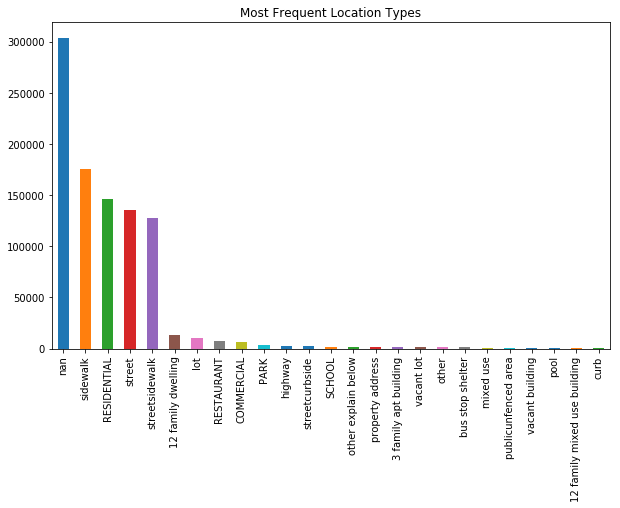

In [96]:
(df['Location Type'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Most Frequent Location Types')

## Status Variable

In [97]:
df['Status'].unique()

array(['Closed', 'Pending', 'Assigned', 'Open', 'Started', 'In Progress'],
      dtype=object)

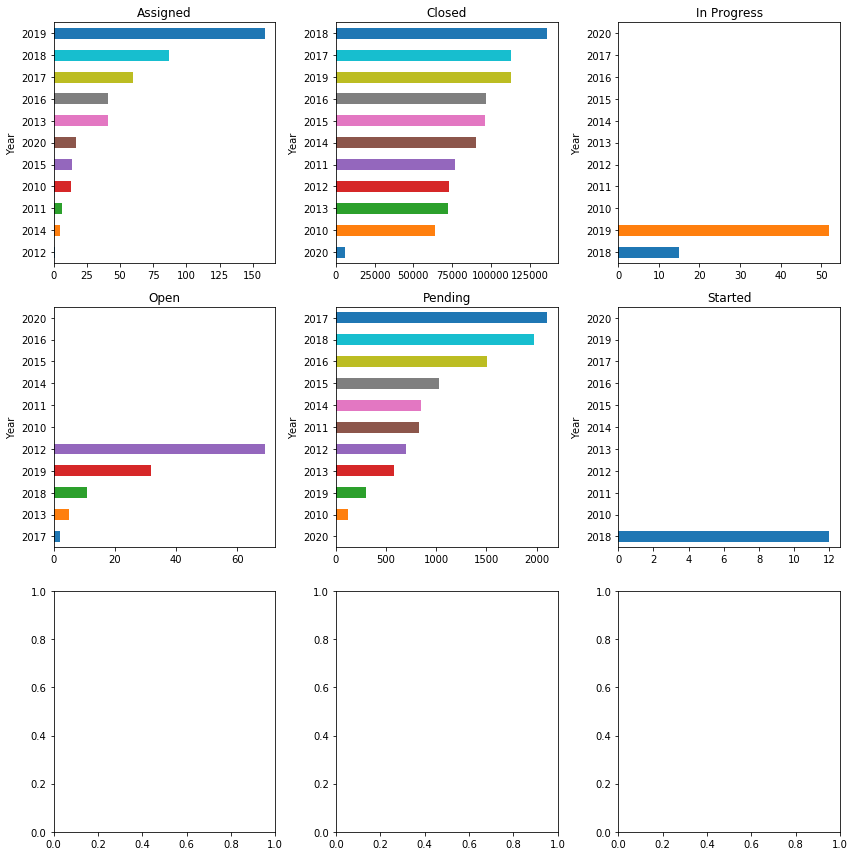

In [98]:
borough_comp = df.groupby(['Year','Status']).size().unstack()

col_number = 3
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

In [99]:
df[df['Status']!='Closed'][["Complaint Type","Status","Descriptor","Year","Resolution Description"]]

,Complaint Type,Status,Descriptor,Year,Resolution Description
115,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
194,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
498,Other Complaints,Pending,request clean vacant lot,2014,department sanitation found open service request already exists loc
545,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
551,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
675,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
738,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
824,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
887,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
953,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item


#### Derelict Vehicle means Abondend Vehicle they cant stay for years on streets some one will report or authorities with take a look so the incidents below certain year can be removed as they forgot to close the request
It can be observed that

1. There are many direlict vehicle complaints reported few years ago and "Department of Sanitation has removed vehicles" but the incidents were not closed

##### I have to remove above rows as they are outliers and are supposed to be closed

In [100]:
df[(df['Status']!='Closed' ) & (df['Descriptor'].str.contains("derelict vehicl") ) & (df['Resolution Description'].str.contains("removed") )]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
115,27847308,2014-04-14 09:05:00,2014-04-14 12:00:00,DSNY,BCC - Staten Island,StreetComplaints,derelict vehicl,street,10308,DALEHAM STREET,...,Unspecified,STATEN ISLAND,40.565165,-74.151871,"(40.565165322983745, -74.15187077083822)",0.0,0.0,2014,4,0
194,27850015,2014-04-15 06:20:00,2014-04-15 12:00:00,DSNY,BCC - Staten Island,StreetComplaints,derelict vehicl,street,10314,212 WILD AVENUE,...,Unspecified,STATEN ISLAND,40.588813,-74.189765,"(40.588813145487904, -74.1897653243024)",0.0,0.0,2014,4,1
545,27865346,2014-04-17 14:36:00,2014-04-17 14:36:00,DSNY,BCC - Staten Island,StreetComplaints,derelict vehicl,street,10314,14 FARRADAY STREET,...,Unspecified,STATEN ISLAND,40.616462,-74.154930,"(40.616461624010114, -74.1549302659375)",0.0,0.0,2014,4,3
551,27865345,2014-04-17 17:31:00,2014-04-17 17:31:00,DSNY,BCC - Staten Island,StreetComplaints,derelict vehicl,street,10314,NaN,...,Unspecified,STATEN ISLAND,40.612528,-74.159182,"(40.61252800916059, -74.15918198573071)",0.0,0.0,2014,4,3
675,27870762,2014-04-18 08:58:00,2014-04-18 12:00:00,DSNY,BCC - Staten Island,StreetComplaints,derelict vehicl,street,10310,28 WEST STREET,...,Unspecified,STATEN ISLAND,40.633663,-74.118347,"(40.63366280916074, -74.11834701191925)",0.0,0.0,2014,4,4
738,27873135,2014-04-18 17:55:00,2014-04-18 17:55:00,DSNY,BCC - Staten Island,StreetComplaints,derelict vehicl,street,10301,20 STANLEY AVENUE,...,Unspecified,STATEN ISLAND,40.636269,-74.086386,"(40.63626862039764, -74.08638572684241)",0.0,0.0,2014,4,4
824,27877107,2014-04-19 10:32:00,2014-04-19 12:00:00,DSNY,BCC - Staten Island,StreetComplaints,derelict vehicl,street,10305,70 HANCOCK STREET,...,Unspecified,STATEN ISLAND,40.588664,-74.095595,"(40.588663833683576, -74.09559528173874)",0.0,0.0,2014,4,5
887,27882363,2014-04-20 12:32:00,2014-04-20 12:32:00,DSNY,BCC - Staten Island,StreetComplaints,derelict vehicl,street,10312,389 SHIRLEY AVENUE,...,Unspecified,STATEN ISLAND,40.530897,-74.168837,"(40.53089732181736, -74.16883707227473)",0.0,0.0,2014,4,6
953,27886115,2014-04-21 12:45:00,2014-04-21 12:45:00,DSNY,BCC - Staten Island,StreetComplaints,derelict vehicl,street,10308,145 RAMBLEWOOD AVENUE,...,Unspecified,STATEN ISLAND,40.545892,-74.155346,"(40.54589208962995, -74.15534594894825)",0.0,0.0,2014,4,0
954,27886119,2014-04-21 08:30:00,2014-04-21 12:00:00,DSNY,BCC - Staten Island,StreetComplaints,derelict vehicl,street,10308,231 BARLOW AVENUE,...,Unspecified,STATEN ISLAND,40.559009,-74.155420,"(40.5590094537926, -74.1554196356203)",0.0,0.0,2014,4,0


##### I am changing the status of those incidents that has to be closed 

In [101]:
df.loc[((df['Status']!='Closed' ) 
       & (df['Descriptor'].str.contains("derelict vehicl") ) 
       & (df['Resolution Description'].str.contains("removed"))) , "Status"] = "Closed"

    

In [102]:
#df.drop(df[(df['Status']!='Closed' ) & (df['Descriptor'].str.contains("derelict vehicl") ) & (df['Resolution Description'].str.contains("removed") )].index,inplace = True)

In [104]:
df[(df['Status']!='Closed' ) & (df['Descriptor'].str.contains("derelict vehicl") ) & (df['Resolution Description'].str.contains("removed") )]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek


In [ ]:
borough_comp = df.groupby(['Year','Status']).size().unstack()

col_number = 3
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

In [105]:
df.shape

(949095, 34)

In [106]:
df = df[df['Location Type'] != 'nan']

A location Type can be different in same area Refer BrooklynAnalysis.ipynb so it is not possible to predict complex multiclass variable

###########################################################################################################################
#################################################################################################################################################

## MULTI CLASS CLASSIFICATION  

----> Example : A fruit is ORANGE ,APPLE OR PEAR but not both or all three

1. As it is a classification task with more than 2 classes and "IMBALANCED DATASET" 
2. (Classification classess are not of same quanitiy)
3. I want to use LOGISTIC REGRESSION / KERAS/ CSR MATRIX CROSS VALIDATION
 

In [107]:
df_model = df[["Agency","Descriptor","Complaint Type","Location Type","City","Status","Resolution Description","Latitude","Longitude","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]

In [108]:
df_model.dropna(how='any')

,Agency,Descriptor,Complaint Type,Location Type,City,Status,Resolution Description,Latitude,Longitude,Total_Time,Resolution_Time,Year,Month,DayofWeek
12,HPD,garbagerecycling storag,SanitationComplaints,RESIDENTIAL,Staten Island,Closed,department housing preservation development inspected following conditions violations issued complaint clos,40.619168,-74.106521,14.0,14.0,2014,4,0
13,HPD,pest,SanitationComplaints,RESIDENTIAL,Staten Island,Closed,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd,40.618668,-74.123417,11.0,11.0,2014,4,0
14,HPD,electricgas rang,Other Complaints,RESIDENTIAL,Staten Island,Closed,department housing preservation development inspected following conditions violations issued complaint clos,40.633228,-74.119305,10.0,10.0,2014,4,0
15,DOHMH,condition attracting rod,rodent,12 family dwelling,Staten Island,Closed,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu,40.619588,-74.162873,9.0,9.0,2014,4,0
18,DOHMH,swimming pool unmaintain,WaterComplaints,12 family dwelling,Staten Island,Closed,department health mental hygiene review service request types complaints usually result agency contact inspection status available wwwnycgov within days date submitted request note service request number future refer,40.619588,-74.162873,15.0,14.0,2014,4,0
31,DSNY,e dirty sidewalk,SanitationComplaints,sidewalk,Staten Island,Closed,department sanitation investigated complaint issued notice viol,40.589934,-74.077868,1.0,1.0,2014,4,0
32,DSNY,street conddumpoutdropoff,SanitationComplaints,street,Staten Island,Closed,department sanitation investigated complaint addressed issue problem persists call enter new complaint outside new york city please call newyork,40.526556,-74.178851,2.0,2.0,2014,4,0
33,HPD,wire,electric,RESIDENTIAL,Staten Island,Closed,department housing preservation development inspected following conditions violations issued complaint clos,40.589450,-74.097832,15.0,15.0,2014,4,0
34,HPD,floor,BuildingComplaints,RESIDENTIAL,Staten Island,Closed,department housing preservation development inspected following conditions violations issued information specific violations available wwwnycgovhpd,40.618668,-74.123417,11.0,11.0,2014,4,0
35,HPD,apart,HeatComplaints,RESIDENTIAL,Staten Island,Closed,department housing preservation development responded complaint heat hot water advised tenant building heat hot water restored condition still exists please file new complaint,40.637274,-74.088405,3.0,3.0,2014,4,0


In [109]:
df_model.shape

(645426, 14)

In [110]:
df_model_label = df_model.copy()

In [111]:
label_encoder = LabelEncoder()
df_model_label['Agency']=label_encoder.fit_transform(df_model['Agency'])
df_model_label['Descriptor']=label_encoder.fit_transform(df_model['Descriptor'])
df_model_label['City']=label_encoder.fit_transform(df_model['City'])
df_model_label['Status']=label_encoder.fit_transform(df_model['Status'])
df_model_label['Resolution Description']=label_encoder.fit_transform(df_model['Resolution Description'])
df_model_label['Complaint Type']=label_encoder.fit_transform(df_model['Complaint Type'])
df_model_label['Location Type']=label_encoder.fit_transform(df_model['Location Type'])

In [112]:
df_model_label.head()

,Agency,Descriptor,Complaint Type,Location Type,City,Status,Resolution Description,Latitude,Longitude,Total_Time,Resolution_Time,Year,Month,DayofWeek
12,13,242,10,8,4,1,202,40.619168,-74.106521,14.0,14.0,2014,4,0
13,13,345,10,8,4,1,203,40.618668,-74.123417,11.0,11.0,2014,4,0
14,13,192,7,8,4,1,202,40.633228,-74.119305,10.0,10.0,2014,4,0
15,7,115,24,0,4,1,158,40.619588,-74.162873,9.0,9.0,2014,4,0
18,7,470,15,0,4,1,163,40.619588,-74.162873,15.0,14.0,2014,4,0


## Feature Engineering

### Correlation

1. Correlation is from 0 to 1 where 0 indicates least correlation and 1 indicates highest

,Agency,Descriptor,Complaint Type,Location Type,City,Status,Resolution Description,Latitude,Longitude,Total_Time,Resolution_Time,Year,Month,DayofWeek
Agency,1.000000,-0.058218,-0.412560,-0.165445,0.011707,-0.009841,0.538638,0.164053,0.104772,-0.143229,-0.141748,0.048120,0.014521,0.112820
Descriptor,-0.058218,1.000000,0.062181,-0.146005,-0.000509,-0.020642,0.005444,0.008115,0.005749,0.059317,0.059151,0.037734,-0.004354,-0.020357
Complaint Type,-0.412560,0.062181,1.000000,0.280189,0.011353,0.031459,-0.110050,-0.117285,-0.085225,0.035779,0.034740,0.074060,0.007925,-0.018799
Location Type,-0.165445,-0.146005,0.280189,1.000000,0.005917,0.010753,0.180482,-0.247486,-0.187333,0.047119,0.047754,0.056370,-0.027978,-0.046401
City,0.011707,-0.000509,0.011353,0.005917,1.000000,0.000404,0.003245,0.005636,0.016395,0.001524,0.001520,0.007177,0.001339,-0.000281
Status,-0.009841,-0.020642,0.031459,0.010753,0.000404,1.000000,-0.016223,-0.005708,-0.002630,-0.004130,-0.005188,0.010222,0.010634,0.001997
Resolution Description,0.538638,0.005444,-0.110050,0.180482,0.003245,-0.016223,1.000000,-0.009450,-0.024616,-0.150664,-0.150151,0.096557,0.010027,0.114174
Latitude,0.164053,0.008115,-0.117285,-0.247486,0.005636,-0.005708,-0.009450,1.000000,0.647148,-0.038693,-0.038539,-0.016993,0.007777,0.003144
Longitude,0.104772,0.005749,-0.085225,-0.187333,0.016395,-0.002630,-0.024616,0.647148,1.000000,-0.017485,-0.017376,-0.024333,0.005777,-0.014386
Total_Time,-0.143229,0.059317,0.035779,0.047119,0.001524,-0.004130,-0.150664,-0.038693,-0.017485,1.000000,0.998927,-0.113439,0.013079,-0.034089


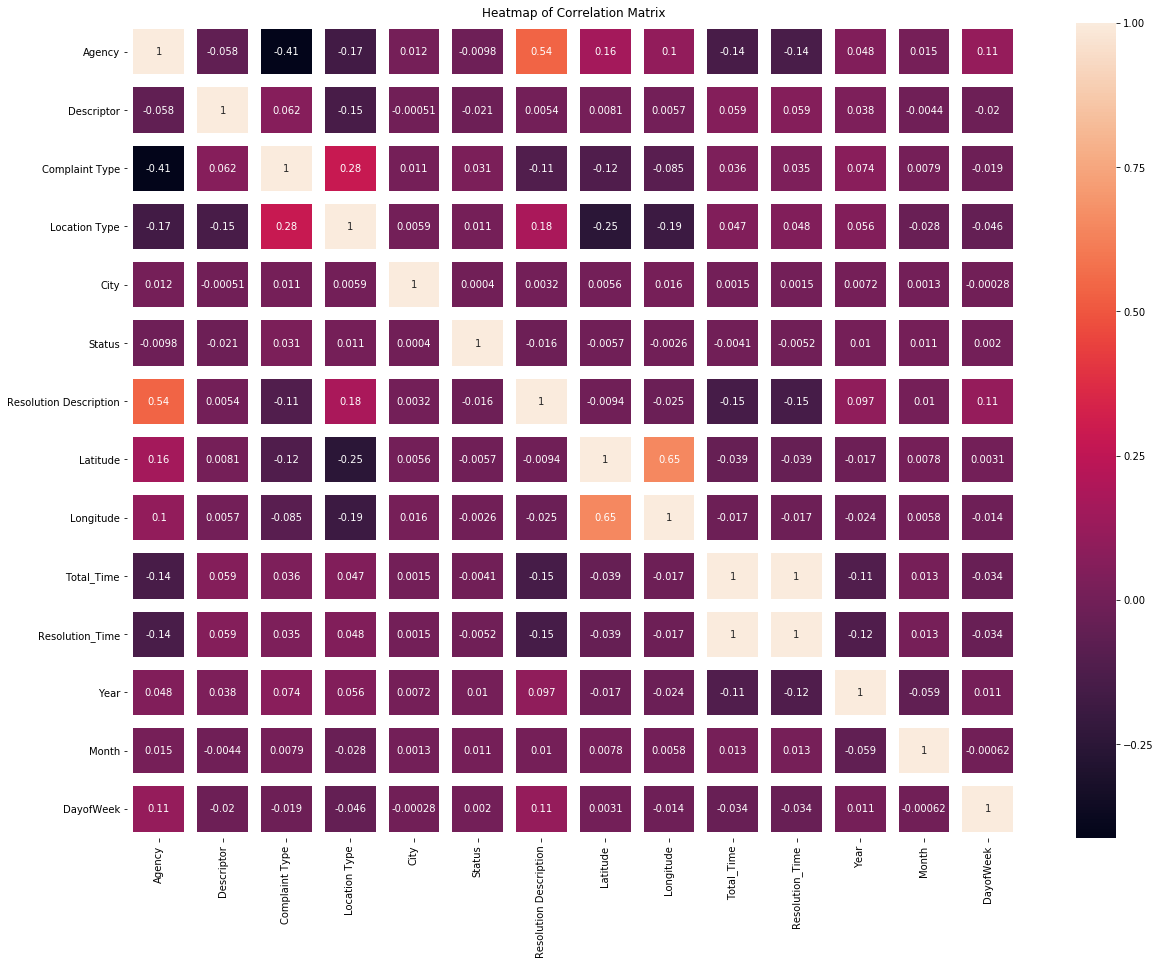

In [113]:
corr = df_model_label.corr()
fig, ax = plt.subplots(figsize=(20,15))    
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=12, 
            ax=ax,
            annot=True, 
            annot_kws={"size": 10})
plt.title('Heatmap of Correlation Matrix')
corr

1. Complaint Type is correlated to Location Type
2. Resolution Description and Agency are correlated

In [114]:
X = df_model_label[["Agency","Descriptor","Location Type","City","Status","Resolution Description","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model_label["Complaint Type"]

X = df_model[["Agency","Descriptor","Location","City","Status","Resolution Description","Latitude","Longitude","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model["Complaint Type"]

train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size=1/7.0, random_state=122)

### Feature Importance and Selection

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Descriptor                0.371076
Resolution Description    0.177079
Location Type             0.173088
Agency                    0.160039
Total_Time                0.034644
Resolution_Time           0.029612
Year                      0.027322
Month                     0.016502
DayofWeek                 0.010401
Status                    0.000212
City                      0.000026
dtype: float64

No handles with labels found to put in legend.


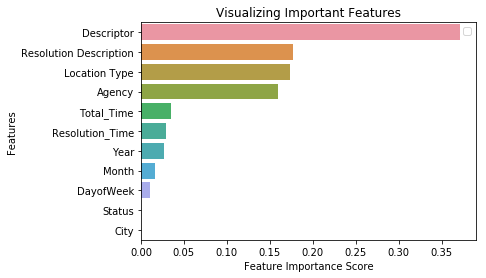

In [116]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Baseline Model : Logistic Regression

In [117]:
train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size=1/7.0, random_state=122)
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [118]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(train_img, train_lbl)

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
import sklearn.metrics as metrics
# use the model to make predictions with the test data
y_pred = model.predict(test_img)
# how did our model perform?
count_misclassified = (test_lbl != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(test_lbl, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 34995
Accuracy: 0.62


####### the above gives the misclassifed samples 
##### Evaluate the model thru Confusion Matrix but here its multi class so hard to understand but lets calculate precision and accuracy

In [120]:
cnf_matrix = metrics.confusion_matrix(test_lbl, y_pred)
cnf_matrix

array([[    8,   324,     0,   200,     0,     0,     0,   207,     0,
            0,   288,     0,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    8,  1932,     0,   432,     0,     0,     1,   268,     2,
            0,   218,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,    26,     0,     0],
       [    0,     0,   160,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,    10,     7],
       [    0,   434,     0,  1915,     0,     0,   189,     3,     0,
            0,    50,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,    10,     3,     3,   319,     0,
            0,    30,     0,     4,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     3,     0],


We have to take accuracy into consideration as it is very less for our baseline model lets try with random forest classifer as tree based modelsa are robust and works well for classification

In [121]:
np.diag(cnf_matrix)

array([    8,  1932,   160,  1915,    10,     0,  8852,  5669,     0,
       11541,  2799,     0, 18657,     0,     0,     0,     0,     0,
           0,     0,     0,   465,     0,  3511,  1690], dtype=int64)

In [122]:
np.sum(cnf_matrix, axis = 0)

array([  324,  5355,   191,  3656,    10,    14, 10097, 12411,    10,
       17542,  8958,     0, 23777,     0,     0,    45,    10,     0,
           0,    73,     0,  1804,    30,  4391,  3506], dtype=int64)

In [123]:
recall = np.mean(np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 1))

In [124]:
(np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 0))

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.02469136, 0.36078431, 0.83769634, 0.5237965 , 1.        ,
       0.        , 0.87669605, 0.45677222, 0.        , 0.65790674,
       0.31245814,        nan, 0.78466585,        nan,        nan,
       0.        , 0.        ,        nan,        nan, 0.        ,
              nan, 0.25776053, 0.        , 0.79959007, 0.4820308 ])

In [125]:
precision = np.mean(np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 0))

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [126]:
print("precision",precision)
print("recall",recall)

precision nan
recall 0.3038749728488323


Accuracy is the main metric for multi class classification as precision and recall scores doesnt play an important role as we are taking aaverage of individual classes (Each complaint Type)

### Random Forests Classification

My favourite is tree based models as they work faster and works well with classification 
Its used to identify feature importance too

In [128]:
X = df_model_label[["Agency","Descriptor","Location Type","City","Status","Resolution Description","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model_label["Complaint Type"]

In [129]:
clf=RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9895314727208875


In [130]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 2027


#### Checking if my model is overfitting --- 10 Fold CV

In [131]:
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(scores)

[0.93481865 0.93622856 0.95280666 0.96702973 0.96279999 0.94378941
 0.92747358 0.92118311 0.95204673 0.95217068]


My number of missclassifed samples are extremely less and thats why accuracy score went up which is good

Ideas!!

How  about holidays and Season? Does these complaints go up or what kind of complaints can be expected


## Season

In [132]:
conditions =[
    (df['Month']==1 )| (df['Month']==12)| (df['Month']==2),
    (df['Month']==3) | (df['Month']==4) | ( df['Month']==5),
    (df['Month']==6) | (df['Month']==7) | (df['Month']==8),
    (df['Month']==9)|(df['Month']==10)| (df['Month']==11),
   ]
choices = ['Winter', 'Spring', 'Summer','Fall']
df['Season']= np.select(conditions, choices, default="black")

In [133]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek,Season
12,27842835,2014-04-14 00:00:00,2014-04-28 00:00:00,HPD,Department of Housing Preservation and Development,SanitationComplaints,garbagerecycling storag,RESIDENTIAL,10301,1100 CLOVE ROAD,...,STATEN ISLAND,40.619168,-74.106521,"(40.61916814748877, -74.1065208736386)",14.0,14.0,2014,4,0,Spring
13,27842861,2014-04-14 00:00:00,2014-04-25 00:00:00,HPD,Department of Housing Preservation and Development,SanitationComplaints,pest,RESIDENTIAL,10314,371 MANOR ROAD,...,STATEN ISLAND,40.618668,-74.123417,"(40.61866816530857, -74.12341734287662)",11.0,11.0,2014,4,0,Spring
14,27843006,2014-04-14 00:00:00,2014-04-24 00:00:00,HPD,Department of Housing Preservation and Development,Other Complaints,electricgas rang,RESIDENTIAL,10310,47 CAROLINE STREET,...,STATEN ISLAND,40.633228,-74.119305,"(40.63322814266842, -74.11930459835413)",10.0,10.0,2014,4,0,Spring
15,27843081,2014-04-14 00:00:00,2014-04-23 00:00:00,DOHMH,Department of Health and Mental Hygiene,rodent,condition attracting rod,12 family dwelling,10314,178 JULES DRIVE,...,STATEN ISLAND,40.619588,-74.162873,"(40.61958794769295, -74.16287297790124)",9.0,9.0,2014,4,0,Spring
18,27843401,2014-04-14 00:00:00,2014-04-29 00:00:00,DOHMH,Department of Health and Mental Hygiene,WaterComplaints,swimming pool unmaintain,12 family dwelling,10314,178 JULES DRIVE,...,STATEN ISLAND,40.619588,-74.162873,"(40.61958794769295, -74.16287297790124)",15.0,14.0,2014,4,0,Spring


In [134]:
df_model = df[["Agency","Descriptor","Complaint Type","Season","Location Type","City","Status","Resolution Description","Latitude","Longitude","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]

In [136]:
label_encoder = LabelEncoder()
df_model['Agency.']=label_encoder.fit_transform(df_model['Agency'])
df_model['Descriptor.']=label_encoder.fit_transform(df_model['Descriptor'])
df_model['City.']=label_encoder.fit_transform(df_model['City'])
df_model['Status.']=label_encoder.fit_transform(df_model['Status'])
df_model['Resolution Description.']=label_encoder.fit_transform(df_model['Resolution Description'])
df_model['Complaint Type.']=label_encoder.fit_transform(df_model['Complaint Type'])
df_model['Location Type.']=label_encoder.fit_transform(df_model['Location Type'])
df_model['Season.']=label_encoder.fit_transform(df_model['Season'])

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set

In [137]:
X = df_model[["Agency.","Descriptor.","Location Type.","City.","Status.","Resolution Description.","Season.","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model["Complaint Type."]

No handles with labels found to put in legend.


Descriptor.                0.363740
Resolution Description.    0.188062
Location Type.             0.173823
Agency.                    0.144529
Total_Time                 0.036432
Resolution_Time            0.031278
Year                       0.030421
DayofWeek                  0.012977
Month                      0.012925
Season.                    0.005574
Status.                    0.000221
City.                      0.000019
dtype: float64


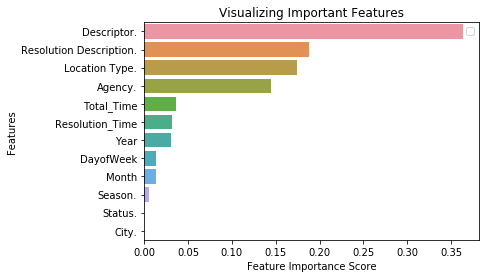

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
print(feature_imp)

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Trying KNN Classifier

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) # 70% training and 30% test


#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9830654657384262


#df_model_loctype = df[["Agency","Location","Location Type","City","Incident Zip","Latitude","Longitude"]]
# CountVectorizer - Simply, counts word frequencies 
# TFIDF - More importance/weights on "rare" words. Less importance/weights on "frequent" words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# LabelBinarizer - Converts labels into numerical representation "G,B,R" -> [1,2,3]
from sklearn.preprocessing import LabelBinarizer
from scipy.sparse import vstack, hstack, csr_matrix

## APPLYING COUNT VECTORIZATION THAT CONVERTS IT INTO A SPARSE AMTRIX

cv = CountVectorizer(min_df=10)
X_ResDes = cv.fit_transform(df['Resolution Description'])
X_ResDes

##############################################################################################

cv = CountVectorizer()
X_LocType = cv.fit_transform(df['Location Type'])
X_LocType
#################################################################################################

## TF IDF Vectorization ----> More importance is given to rare words
## Count Vectorizor --> Gives the frequencies of Words
## Label Binarizer --> Coverts G,B,R --> 1,2,3

################################################################################################

cv = CountVectorizer()
X_Des = cv.fit_transform(df['Descriptor'])
#X_sub1 = cv.fit_transform(combined['sub_category_1'])
#X_sub2 = cv.fit_transform(combined['sub_category_2'])
X_Des

###############################################################################################

# Apply TFIDF to "resolution_description", 
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(df['Resolution Description'])

tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_descriptor = tv.fit_transform(df['Descriptor'])

# Apply LabelBinarizer to "Location Type"
lb = LabelBinarizer(sparse_output=True)
X_Loc = lb.fit_transform(df['Location Type'])

# Apply LabelBinarizer to "Location Type"
lb = LabelBinarizer(sparse_output=True)
X_Com = lb.fit_transform(df['Complaint Type'])

#####################################################################################################

####### Creating CSR Matrix

####### Merging the Sparse Matrices

# Create our final sparse matrix
X_dummies = csr_matrix(pd.get_dummies(df[['Agency','City', 'Status','Latitude',
                                                'Longitude','Total_Time','Resolution_Time',
                                                'Year','Month','DayofWeek']], sparse=True).values)

# Combine everything together
sparse_merge = hstack((X_dummies, X_description, X_descriptor, X_Loc,X_Com)).tocsr()

####################################################################################################

X_train = sparse_merge[:len(df)]

y = sparse_merge[len(df):]

from sklearn.model_selection import KFold
eval_size = .10
kf = KFold(10,shuffle=False)
i = 0
for train_indicies, valid_indicies in kf.split(X_train,y):
    print("TRAIN:", train_indices, "TEST:", test_indices)
    X_train, y_train = X_train[train_indicies], y[train_indicies]
    X_valid, y_valid = X_train[valid_indicies], y[valid_indicies]
    i = i+1

##### TF IDF